필요한 라이브러리 install

In [1]:
!pip install bs4
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.0/476.0 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.9 MB/s eta 0:00:00


### 네이버 지식인

일단 하나만 시도해보자

In [43]:
import requests
from bs4 import BeautifulSoup

url = "https://kin.naver.com/qna/detail.naver?d1id=4&dirId=40107&docId=475306926"

r = requests.get(url)

soup = BeautifulSoup(r.text, "html.parser")

# .questionDetail 요소 선택
items = soup.select(".questionDetail")

# 리스트로 반환된 각 요소에서 텍스트 추출
for item in items:
    print(item.text.strip())  # 텍스트 추출 및 공백 제거

우리은행 뱅킹어플 두개의 폰으로 하나의 계좌 관리가 가능한가요?


오 됐다!

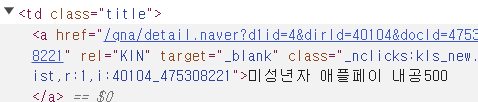

In [18]:
import requests
from bs4 import BeautifulSoup

# 질문 목록 페이지 URL
list_url = "https://kin.naver.com/qna/list.naver?dirId=401"

# 질문 목록 페이지에서 각 질문의 URL들 추출
r = requests.get(list_url)
soup = BeautifulSoup(r.text, "html.parser")

# 각 url에서 <a 부분이 각 질문에 따라 달라지는 부분 -> 그 부분을 추출
question_links = soup.select("td.title > a")
print("첫 번째 url:", question_links[0])

# 기본 url + 위에서 뽑아낸 부분에서 'href'부분 합쳐서 질문별 url 생성
base_url = "https://kin.naver.com"
question_urls = [base_url + link['href'] for link in question_links]

# 2. 각 질문 URL에서 질문 내용을 추출
for i, question_url in enumerate(question_urls[:10],1):
    r = requests.get(question_url)
    soup = BeautifulSoup(r.text, "html.parser")

    # 질문 내용이 있는 부분 선택
    question_content = soup.select_one(".questionDetail").text.strip()

    print(f"질문 {i}:")
    print(question_content)
    print("-" * 80)

첫 번째 url: <a class="_nclicks:kls_new.list,r:1,i:4010501_475309440" href="/qna/detail.naver?d1id=4&amp;dirId=4010501&amp;docId=475309440" rel="KIN" target="_blank">디딤돌대출 신청시 현거주지의 계약명의자가 중요한가요?</a>
질문 1:
현재 주택은 어머님 명의로 전세계약을 했습니다.본인을 포함하여 형제 부모님 4명이 거주중이고제가 디딤돌 대출을 받으려 합니다.(만 30세 이상, 미혼, 아버지(만 60세이상) 부양가족)그런데 어머님이 과거 주택 보유 이력이 있습니다.그래서 최근 전입신고를 했습니다.따라서 현재 세대주는 본인이고세대원은 아버지는 만 60세 이상, 형제 한명인데모두 주택보유이력이 없습니다.현 거주지의 계약자가 어머님인데어머님은 등본에 같이 없는 상태인데이런 경우 디딤돌 대출시에 문제가 될까요?현거주지의 계약명의자가 누구인지 확인을 하나요?자산은 배우자가 없는 경우 신청자 본인의 것만 한다고 하여자산으로는 문제가 없을거 같습니다.
--------------------------------------------------------------------------------
질문 2:
제가 수요일부터 급성요통으로 한의원에서 침맞고 물리치료 받고가루약(허리통증이 심해서) 먹고있는데 한의원 실비 안되는걸루 알고 있다가 혹시나 알아보니 급여 부분은 보상하다고 하는데실비청구 가능할까요?
--------------------------------------------------------------------------------
질문 3:
안녕하세요.. 주식 초보라 영웅문 HTS 부터 시작하고 있습니다. 주주 구분 현황에 개인/법인 3명이 약 천만주 20% 인데요..이게 아래 주주 상세 최대주주 보유수량과 같은건가요?
------------------------------------------------------------------

In [37]:
questions = []

for i, question_url in enumerate(question_urls[:10],1):   ######### 일단 10개로 진행해보자
    r = requests.get(question_url)
    soup = BeautifulSoup(r.text, "html.parser")

    question_content = soup.select_one(".questionDetail").text.strip()
    questions.append(question_content)

In [38]:
questions

['현재 주택은 어머님 명의로 전세계약을 했습니다.본인을 포함하여 형제 부모님 4명이 거주중이고제가 디딤돌 대출을 받으려 합니다.(만 30세 이상, 미혼, 아버지(만 60세이상) 부양가족)그런데 어머님이 과거 주택 보유 이력이 있습니다.그래서 최근 전입신고를 했습니다.따라서 현재 세대주는 본인이고세대원은 아버지는 만 60세 이상, 형제 한명인데모두 주택보유이력이 없습니다.현 거주지의 계약자가 어머님인데어머님은 등본에 같이 없는 상태인데이런 경우 디딤돌 대출시에 문제가 될까요?현거주지의 계약명의자가 누구인지 확인을 하나요?자산은 배우자가 없는 경우 신청자 본인의 것만 한다고 하여자산으로는 문제가 없을거 같습니다.',
 '제가 수요일부터 급성요통으로 한의원에서 침맞고 물리치료 받고가루약(허리통증이 심해서) 먹고있는데 한의원 실비 안되는걸루 알고 있다가 혹시나 알아보니 급여 부분은 보상하다고 하는데실비청구 가능할까요?',
 '안녕하세요.. 주식 초보라 영웅문 HTS 부터 시작하고 있습니다. 주주 구분 현황에 개인/법인 3명이 약 천만주 20% 인데요..이게 아래 주주 상세 최대주주 보유수량과 같은건가요?',
 '안녕하세요면허 취소가 되어서 운전을 할 수 없게 되었습니다차가 명의는 제 명의로 되어있습니다. 면허 취소기간동안 여자친구 한테 차를 줄려고 합니다여자친구가 보험 가입만 하면 되는것인가요?아니면 명의변경까지 해야하나요?',
 '저는 기업은행 체크카드 쓰긴하는데 유효기간이 담달까지라 아직 재 발급안했는데 이런문자가 오네요? 보이스피싱이에요? 기업은행이라 써있는데..',
 '최수연 ceo와 나머지 임원진들 주식보유량을 알고싶습니다',
 '혹시 신용회복워원회 기간 납부하고 기간 끝남 일시상환으로 대출갚아야하는건가요?',
 '저는 50대 여성이고 직장은 5년째 다니는 중입니다연봉은 작년 기준 4577만원이였고 보통 비슷합니다신용점수는 kcb 690 nice 830기대출은농협 마이너스통장 3000현대캐피탈 차량 할부금 1600카드론 1100삼성화재 400어제 nh저축은

이제 해야 하는 일이.. 이걸 각 글자? 단위로 나눠서 쪼개놔야해

      ['한 군 데 서 필 름 을 너 무 낭 비 한 작 품 입 니 다 .', '하 지 만 이 영 화 에 는 감 히 별 5 개 를 주 고 싶 다']

이것처럼...

In [41]:
texts = []
labels = []
for question in questions:
  wo_blank = question.replace(' ','') # 공백제거
  num = [0] * len(wo_blank)
  result = ' '.join(list(wo_blank))
  labels.append(num)
  texts.append(result)

texts[1:3]

['제 가 수 요 일 부 터 급 성 요 통 으 로 한 의 원 에 서 침 맞 고 물 리 치 료 받 고 가 루 약 ( 허 리 통 증 이 심 해 서 ) 먹 고 있 는 데 한 의 원 실 비 안 되 는 걸 루 알 고 있 다 가 혹 시 나 알 아 보 니 급 여 부 분 은 보 상 하 다 고 하 는 데 실 비 청 구 가 능 할 까 요 ?',
 '안 녕 하 세 요 . . 주 식 초 보 라 영 웅 문 H T S 부 터 시 작 하 고 있 습 니 다 . 주 주 구 분 현 황 에 개 인 / 법 인 3 명 이 약 천 만 주 2 0 % 인 데 요 . . 이 게 아 래 주 주 상 세 최 대 주 주 보 유 수 량 과 같 은 건 가 요 ?']

In [33]:
text = '전세계약을 했습니다.본인을 포함하여 형제 부모님'
result1 = text.replace(' ','')
num = [0] * len(result1)
result = ' '.join(list(result1))
print(result)
print(num)

전 세 계 약 을 했 습 니 다 . 본 인 을 포 함 하 여 형 제 부 모 님
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 은행 FAQ (하나은행으로)

- 나머지 은행은 질문 개수가 적어서 패스..

In [78]:
import requests
from bs4 import BeautifulSoup

def get_questions(url):

  r = requests.get(url)

  soup = BeautifulSoup(r.text, "html.parser")

  # .questionDetail 요소 선택
  items = soup.select("ul.faqList li a")

  # 리스트로 반환된 각 요소에서 텍스트 추출
  for item in items:
      text = item.get_text(strip = True)[4:]
      questions.append(text)

In [74]:
get_questions(url1)

금융인증서의 갱신발급(기한연장)은 언제하면 됩니까?
여권조합번호를 실명번호로 사용하고 있습니다. 인증서를 발급받을 수 있나요?
금융인증서 비밀번호를 분실한 경우 어떻게 해야하나요?
해외에서도 금융인증서를 이용할 수 있나요?
금융인증서를 발급 받으면 기존에 이용하던 공동인증서(구. 공인인증서)는 어떻게 되나요?
금융인증서 이용중입니다. 휴대전화번호를 바꾸었는데, 기존 클라우드에 저장되어있는 금융인증서를 사용할 수 있나요?
금융인증서 이용중입니다. 휴대전화 번호는 바꾸지 않고, 휴대전화 기기만 변경한 경우 기존에 생성한 클라우드 그대로 이용할 수 있나요?
금융인증서를 공공기관에서도 이용이 가능한가요?
하나원큐와 PC에서 금융인증서를 이용하고 싶습니다. 인증서 복사를 해야하나요?
이미 타행에서 금융인증서를 발급받았습니다. 추가 발급을 해야 하나요?


In [92]:
questions = []
url1 = "https://www.kebhana.com/cont/customer/customer01/index.jsp"
r = requests.get(url1)
soup = BeautifulSoup(r.text, "html.parser")
items = soup.select("ul.faqList li a")

for item in items:
  text = item.get_text(strip = True)[4:]
  questions.append(text)

questions

['금융인증서의 갱신발급(기한연장)은 언제하면 됩니까?',
 '여권조합번호를 실명번호로 사용하고 있습니다. 인증서를 발급받을 수 있나요?',
 '금융인증서 비밀번호를 분실한 경우 어떻게 해야하나요?',
 '해외에서도 금융인증서를 이용할 수 있나요?',
 '금융인증서를 발급 받으면 기존에 이용하던 공동인증서(구. 공인인증서)는 어떻게 되나요?',
 '금융인증서 이용중입니다. 휴대전화번호를 바꾸었는데, 기존 클라우드에 저장되어있는 금융인증서를 사용할 수 있나요?',
 '금융인증서 이용중입니다. 휴대전화 번호는 바꾸지 않고, 휴대전화 기기만 변경한 경우 기존에 생성한 클라우드 그대로 이용할 수 있나요?',
 '금융인증서를 공공기관에서도 이용이 가능한가요?',
 '하나원큐와 PC에서 금융인증서를 이용하고 싶습니다. 인증서 복사를 해야하나요?',
 '이미 타행에서 금융인증서를 발급받았습니다. 추가 발급을 해야 하나요?']

In [93]:
for i in range(2,6,2):
  url = f"https://www.kebhana.com/cont/customer/customer01/index,1,list,{i}.jsp"
  get_questions(url)
questions

['금융인증서의 갱신발급(기한연장)은 언제하면 됩니까?',
 '여권조합번호를 실명번호로 사용하고 있습니다. 인증서를 발급받을 수 있나요?',
 '금융인증서 비밀번호를 분실한 경우 어떻게 해야하나요?',
 '해외에서도 금융인증서를 이용할 수 있나요?',
 '금융인증서를 발급 받으면 기존에 이용하던 공동인증서(구. 공인인증서)는 어떻게 되나요?',
 '금융인증서 이용중입니다. 휴대전화번호를 바꾸었는데, 기존 클라우드에 저장되어있는 금융인증서를 사용할 수 있나요?',
 '금융인증서 이용중입니다. 휴대전화 번호는 바꾸지 않고, 휴대전화 기기만 변경한 경우 기존에 생성한 클라우드 그대로 이용할 수 있나요?',
 '금융인증서를 공공기관에서도 이용이 가능한가요?',
 '하나원큐와 PC에서 금융인증서를 이용하고 싶습니다. 인증서 복사를 해야하나요?',
 '이미 타행에서 금융인증서를 발급받았습니다. 추가 발급을 해야 하나요?',
 '금융인증서의 발급은 어떻게 하나요?',
 '금융인증서가 무엇인가요?',
 '여권조합번호로 거래하는 사람은 범용 인증서 발급이 가능한가요?',
 '조합번호 전용 공동인증서가 무엇인가요?',
 '하나원큐인증이 무엇인가요?',
 '내 아이 통장만들기 서비스가 무엇인가요?',
 '전자금융 가입 시 ID/PW 입력을 안해도 되나요? 추후 등록하고 싶을땐 어떻게 하나요?',
 '하나원큐인증 로그인을 하려고 하는데, 앱 알림(Push)이 오지 않습니다.',
 '하나원큐인증 로그인이 무엇인가요?',
 '퇴직연금 가입확인서는 어디서 출력할 수 있나요?',
 ' >',
 '[인기][비대면][신분증확인] 비대면 실명 인증할 때 신분증 인식이 안됩니다.',
 '[로그인] 아이디 변경이 가능한가요?',
 '[로그인] 이용자 비밀번호(ID/PW의 PW)를 잊어버렸어요.',
 '[로그인] 이용자 ID(아이디)를 잊어버렸어요. 어떻게 찾나요?',
 '[로그인] 이용자 비밀번호 변경하는 방법은 무엇인가요?',
 '[로그인] 전자금융 이용자 비밀번호를 등록하려고 합니다.',
 '

In [94]:
texts = []
labels = []
for question in questions:
  wo_blank = question.replace(' ','') # 공백제거
  num = [0] * len(wo_blank)
  result = ' '.join(list(wo_blank))
  labels.append(num)
  texts.append(result)

texts[1:3]

['여 권 조 합 번 호 를 실 명 번 호 로 사 용 하 고 있 습 니 다 . 인 증 서 를 발 급 받 을 수 있 나 요 ?',
 '금 융 인 증 서 비 밀 번 호 를 분 실 한 경 우 어 떻 게 해 야 하 나 요 ?']

In [95]:
labels[1:3]

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]